# Homework 4: Optimal Control
Due: May 14, 2025

## Preliminaries
Given the dynamics of a system $\dot{x}(t) = f(t, x(t), u(t))$ and the initial state $x(0)=x_0$. We want to calculate the optimal control signal $u(t)$ for the system to optimally track a desired trajectory $x_d(t)$ within the time horizon $[0,T]$.

$$
\begin{align}
u(t)^* &= \argmin_{u(t)} J(u(t)) \\
&= \argmin_{u(t)} \int_0^T \left[\underbrace{\left(x(t)-x_d(t)\right)^T Q_x\left(x(t)-x_d(t)\right) + u(t)^T R_u(t)}_{l(x(t),u(t))}\right] dt + \underbrace{\left(x(T) - x_d(T)\right)^T P_1\left(x(T)-x_d(T)\right)}_{m(x(T))} \\
\text{s.t. } \,\, &x(t) = x_0 + \int_0^t f\left(x(\tau), u(\tau)\right) d\tau
\end{align}
$$
We can solve this problem using iLQR. In the k-th interation, given the current estimation of the optimal control $u(t)^{[k]}$ and the corresponding system trajectory $x(t)^{[k]}$, we need to calculate the optimal descent direction, denoted as $v(t)^{[k]}$, through another optimal control problem below:

$$
v(t)^{[k]} = \argmin_{v(t)}\underbrace{\int_0^T \underbrace{D_1 l(x(t)^{[k]}, u(t)^{[k]})}_{a_x(t)}\cdot z(t) + \underbrace{D_2 l(x(t)^{[k]}, u(t)^{[k]})}_{b_u(t)}\cdot v(t) dt + \underbrace{D m(x(T)^{[k]})}_{p_1}\cdot z(T)}_{DJ(u(t))\cdot v(t)} + \int_0^T z(t)^T Q_z z(t) + v(t)^T R_v v(t) dt
$$

where $z(t)$ and $v(t)$ are governed by the following linear dynamics:

$$
z(t) = \underbrace{z_0}_{z_0=0} + \int_0^t \underbrace{D_1 f(x(\tau)^{[k]}, u(\tau)^{[k]})}_{A(\tau)}\cdot z(\tau) + \underbrace{D_2 f(x(\tau)^{[k]}, u(\tau)^{[k]})}_{B(\tau)} \cdot v(\tau) d\tau
$$

Once the optimal descent direction is calculated, we can use it to update the control for the next iteration using Armijo line search.

# Problem 1: Descent Direction
The solution of $v(t)^{[k]}$ can be calculated through the following ODEs:

$$
\begin{align}
0 &= p(t)^T B(t) + b_v(t)^T \\
\dot{p}(t) &= -A(t)^T p(t) - a_z(t) \\
\dot{z}(t) &= A(t)z(t) + B(t)v(t)
\end{align}
$$
with initial and terminal conditions being:

$$
z(0) = 0 \,\,\,\, p(T) = p_1
$$

These ODEs can be reorganized into the following two-point boundary value problem, which does not involve $v(t)$ at all.

$$
\begin{bmatrix}
\dot{z}(t) \\ \dot{p}(t)
\end{bmatrix} = \underbrace{\begin{bmatrix}
M_{11} & M_{12} \\ M_{21} & M_{22}
\end{bmatrix}}_{M} \begin{bmatrix}
z(t) \\ p(t)
\end{bmatrix} + \begin{bmatrix}
m_1 \\ m_2
\end{bmatrix}, \,\,\,\, \begin{bmatrix}
z(0) \\ p(T)
\end{bmatrix} = \begin{bmatrix}
0 \\ p_1
\end{bmatrix}
$$

What should $a_z(t)$ $b_v(t)$ be? Note that they are different from the terms $a_x(t)$ and $b_u(t)$ above. What should the block matrix $M$ look like? What should the vectors $m_1$ and $m_2$ look like? (Hint: the block matrix $M$ and vectors $m_1$ and $m_2$ should not include $v(t)$ at all). Lastly, how to calculate $v(t)$ once you have solved the above two point boundary value problem.

**Turn in:** The expressions for $a_z(t), b_v(t)$, the block matrix $M$, the vectors $m_1$ and $m_2$, and $v(t)$ (assuming $p(t)$ and $z(t)$ are solved).

$$
a_z(t) = -A(t)^T p(t) - \dot{p}(t)
$$

$$
b_v(t) = -B(t)^Tp(t)
$$

$$
M = \begin{bmatrix}A(t) & 0 \\ 0 & -A(t)^T \end{bmatrix}
$$

$$
m_1 = -B(t)B(t)^{\dagger}b_v(t)
$$

$$
m_2 = -a_z(t)
$$

$$
v(t) = B(t)^{\dagger}\left(\dot{z}(t) - A(t)z(t)\right)
$$

# Problem 2: 2D Optimization Problem (Gradient Descent)
Solve the following 2D optimization problem for the variable $x = [x_1, x_2]$:

$$
\begin{align}
x^* &= \argmin_{x} f(x) \\
&= \argmin_{x} \left(0.26 \cdot \left(x_1^2+x_2^2\right)-0.46\cdot x_1 x_2\right)
\end{align}
$$

using gradient descent with Armijo line search. The line search process in each iteration is summarized in the pseudocode below. Note that, in practice, the parameter $\alpha$ should be small $[10^{-4}, 10^{-2}]$ and the parameter $\beta$ should be between $[0.2, 0.8]$. Use the initial guess of the variable $x = [-4, -2]$, use the following parameters $\gamma_0 = 1, \alpha = 10^{-4}, \beta = 0.5, i = 100$ ($i$ is number of iterations).

### *Armijo Line Search Pseudocode*

<div style="text-align: center;">
  <img src="armijo_psuedocode.png" alt="Armijo Line Search Pseudocode" />
</div>

Create a plot showing the trajectory of the iterations over thee contour over the objective function.


In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

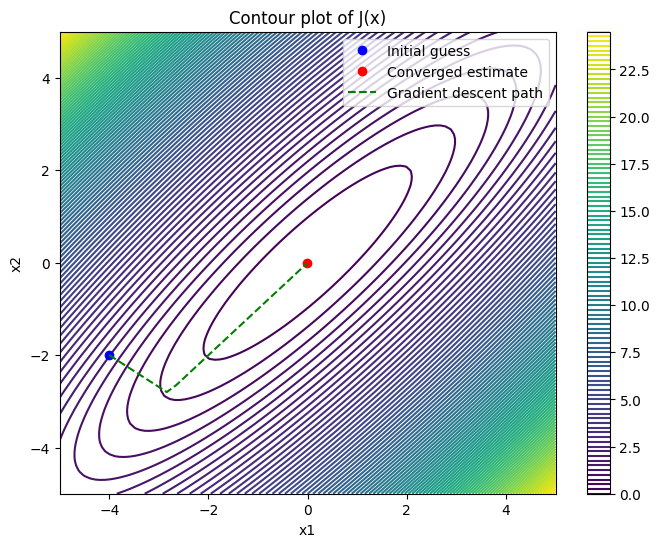

In [143]:
def J(x):
  # 0.26 * (x1^2 +x2^2) - 0.46 * x1 * x2
  return 0.26 * (x[0]**2 + x[1]**2) - 0.46 * x[0] * x[1]

def gradJ(x):
  # ∇J(x) = [dJ/dx1, dJ/dx2]
  # dJ/dx1 = 0.26 * 2 * x1 - 0.46 * x2
  # dJ/dx2 = 0.26 * 2 * x2 - 0.46 * x1
  # ∇J(x) = [0.52 * x1 - 0.46 * x2, 0.52 * x2 - 0.46 * x1]
  return np.array([0.52 * x[0] - 0.46 * x[1], 0.52 * x[1] - 0.46 * x[0]])

def armijo_condition(x_k, gamma, alpha, z_k):
  return J(x_k + gamma * z_k) > J(x_k) + alpha * gamma * gradJ(x_k).T @ z_k

def armijo_line_search(x_k, gamma_0=1.0, alpha=10e-4, beta=0.5):
  gamma = gamma_0
  z_k = -gradJ(x_k) # z_k = -∇J(x_k) -> descent direction
  while armijo_condition(x_k, gamma, alpha, z_k):
    gamma *= beta
  return x_k + gamma * z_k

def gradient_descent(x_0, epsilon=1e-6, max_iter=100):
  x_k = [x_0]
  for _ in range(max_iter):
    x_k_new = armijo_line_search(x_k[-1])
    x_k.append(x_k_new)
    gradient = gradJ(x_k_new)
    if np.linalg.norm(gradient) < epsilon:
      break
  x_k = np.array(x_k)
  return x_k[-1], x_k

def plot_contour(x_0):
  x_min, x = gradient_descent(x_0)
  x1 = np.linspace(-5, 5, 100)
  x2 = np.linspace(-5, 5, 100)
  X1, X2 = np.meshgrid(x1, x2)
  Z = J(np.array([X1, X2]))
  plt.figure(figsize=(8, 6))
  L = 100
  plt.contour(X1, X2, Z, levels=L, cmap='viridis')
  plt.plot(x_0[0], x_0[1], 'bo', label="Initial guess") # plot initial point
  plt.plot(x_min[0], x_min[1], 'ro', label="Converged estimate") # plot minimum point
  # plot gradient descent path
  plt.plot(x[:, 0], x[:, 1], 'g--', label="Gradient descent path")
  plt.colorbar()
  plt.title('Contour plot of J(x)')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.legend()
  # plt.show()
  plt.savefig('gradient_descent_contour.png', dpi=300)

# Run gradient descent with initial guess x = [-4, -2]
x_0 = np.array([-4, -2])
plot_contour(x_0)

# Problem 3: Iterative Linear Quadratic Regulator (iLQR)
Apply iLQR to the diff-drive vehicle for a length of time $T=2\pi sec$ to track the desired trajectory $\left(x_d(t), y_d(t), \theta_d(t)\right) = \left(\frac{4}{2\pi}t, 0, \pi/2\right)$ subject to dynamics:

$$
\begin{equation}
\begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{\theta} \end{bmatrix} = \begin{bmatrix} \cos(\theta)u_1 \\ \sin(\theta)u_1 \\ u_2 \end{bmatrix} ,\,\,\,\, \left(x(0), y(0), \theta(0)\right) = (0, 0, \pi/2)
\end{equation}
$$

Note that the   desired trajectory corresponds to an infeasible trajectory for parallel parking.

Use 3 sets of different initial control trajectories and objective parameters, with one initial control trajectory $[u_1, u_2] = [1, -0.5]$ for the whole horizon. For each set of parameters, choose a convergence criterion and run until convergence. For each set of parameters, generate a figure with 3 plots: The initial and converged system trajectory, the optimal control signals, and the iterations of the objective function value.

In [144]:
# System parameters
T = 2 * np.pi
N = 100
t = np.linspace(0, T, N)
dt = T / N

# Desired trajectory
x_d = 4 / (2 * np.pi) * t
y_d = np.zeros_like(t)
theta_d = (np.pi / 2) * np.ones_like(t)
traj_desired = np.vstack([x_d, y_d, theta_d]).T  # shape (N,3)
initial_state = np.array([0, 0, np.pi / 2])  # shape (3,)

# Cost weights
Q = np.diag([10.0, 10.0, 2.0])
R = np.diag([4.0, 2.0])
Qf = np.diag([20.0, 20.0, 5.0])

# Dynamics and linearization
def dynamics(x, u):
    theta = x[2]
    return np.array([u[0] * np.cos(theta),
                     u[0] * np.sin(theta),
                     u[1]])

def rollout(x0, U):
    X = np.zeros((N+1, 3))
    X[0] = x0
    for k in range(N):
        X[k+1] = X[k] + dt * dynamics(X[k], U[k])
    return X

def runge_kutta(x0, U):
    X = np.zeros((N+1, 3))
    X[0] = x0
    for k in range(N):
        k1 = dynamics(X[k], U[k])
        k2 = dynamics(X[k] + dt / 2 * k1, U[k])
        k3 = dynamics(X[k] + dt / 2 * k2, U[k])
        k4 = dynamics(X[k] + dt * k3, U[k])
        X[k+1] = X[k] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return X


def linearize(x, u):
    theta = x[2]
    u1 = u[0]
    A = np.array([
        [0, 0, -u1 * np.sin(theta)],
        [0, 0,  u1 * np.cos(theta)],
        [0, 0,  0]
    ])
    B = np.array([
        [np.cos(theta), 0],
        [np.sin(theta), 0],
        [0,             1]
    ])
    return A, B


def compute_total_cost(X, U):
    cost = 0.0
    for k in range(N):
        dx = 2 * (X[k] - traj_desired[k])
        cost += dx.T @ Q @ dx + U[k].T @ R @ U[k]
    dx_final = X[-1] - traj_desired[-1]
    cost += dx_final.T @ Qf @ dx_final
    return cost

def discrete_ilqr(x0, U_init, max_iter=10):
    # Discrete iLQR with cost history
    U = U_init.copy()
    alpha = 1.0
    cost_history = []
    for it in range(max_iter):
        # X = rollout(x0, U)
        X = runge_kutta(x0, U)
        cost_current = compute_total_cost(X, U)
        cost_history.append(cost_current)

        # Backward pass
        Vx = 2 * Qf @ (X[-1] - traj_desired[-1])
        Vxx = Qf.copy()
        k_ff = np.zeros_like(U)
        K_fb = np.zeros((N, 2, 3))

        for k in reversed(range(N)):
            A, B = linearize(X[k], U[k])
            dx = X[k] - traj_desired[k]
            qx = 2 * Q @ dx
            qu = 2 * R @ U[k]
            Qx = qx + A.T @ Vx
            Qu = qu + B.T @ Vx
            Qxx = Q + A.T @ Vxx @ A
            Quu = R + B.T @ Vxx @ B
            Qux = B.T @ Vxx @ A

            inv_Quu = np.linalg.inv(Quu)
            k_ff[k] = -inv_Quu @ Qu
            K_fb[k] = -inv_Quu @ Qux

            Vx = Qx + K_fb[k].T @ Quu @ k_ff[k] + \
                K_fb[k].T @ Qu + Qux.T @ k_ff[k]
            Vxx = Qxx + K_fb[k].T @ Quu @ K_fb[k] + \
                Qux.T @ K_fb[k] + K_fb[k].T @ Qux

        # Line search
        for _ in range(10):
            X_roll = rollout(x0, U)
            U_new = U + alpha * k_ff + \
                np.einsum('kij,kj->ki', K_fb, (X_roll[:-1] - traj_desired))
            cost_new = compute_total_cost(rollout(x0, U_new), U_new)
            if cost_new < cost_current:
                break
            alpha *= 0.5

        U = U_new

    X_opt = rollout(x0, U)
    return X_opt, U, cost_history


def create_plots(X_init, X_opt, U_opt, cost_hist, U0):
    # Create Plots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(X_init[:, 0], X_init[:, 1], label='Initial', linestyle='--', color='black')
    axs[0].plot(X_opt[:, 0], X_opt[:, 1], label='Converged')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[0].set_title('State Trajectory')
    axs[0].axis('equal')
    minX, maxX = X_init[:, 0].min(), X_init[:, 0].max()
    minY, maxY = X_init[:, 1].min(), X_init[:, 1].max()
    minX, maxX = min(minX, X_opt[:, 0].min()), max(maxX, X_opt[:, 0].max())
    minY, maxY = min(minY, X_opt[:, 1].min()), max(maxY, X_opt[:, 1].max())
    axs[0].set_xlim(minX - 0.2, maxX + 0.2)
    axs[0].set_ylim(minY - 0.2, maxY + 0.2)
    axs[0].legend(loc='upper right')

    # 2. Optimal control signals
    axs[1].plot(t, U_opt[:, 0], label='u1(t) (linear vel)')
    axs[1].plot(t, U_opt[:, 1], label='u2(t) (angular vel)')
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Control Input')
    axs[1].set_title('Optimal Control Signals')
    axs[1].set_xlim(0, T)
    axs[1].set_ylim(-3, 3)
    axs[1].legend(loc='upper right')

    # 3. Iterations of objective function
    axs[2].plot(cost_hist)
    axs[2].set_xlabel('Iteration')
    axs[2].set_ylabel('Cost')
    axs[2].set_title('Objective Value per Iteration')
    axs[2].set_xlim(0, len(cost_hist) - 1)
    axs[2].set_ylim(-1, np.max(cost_hist) * 1.1)
    axs[2].grid()
    plt.suptitle(f'iLQR Results with Initial Control: {U0[0]}')

    plt.tight_layout()
    # plt.show()
    plt.savefig(f'iLQR_Results_{U0[0][0]}_{U0[0][1]}.png')
    return fig, axs

## Control Trajectories tested
- $[u_1, u_2] = [1, -0.5]$
- $[u_1, u_2] = [0.75, -0.5]$
- $[u_1, u_2] = [0.25, -0.4]$

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


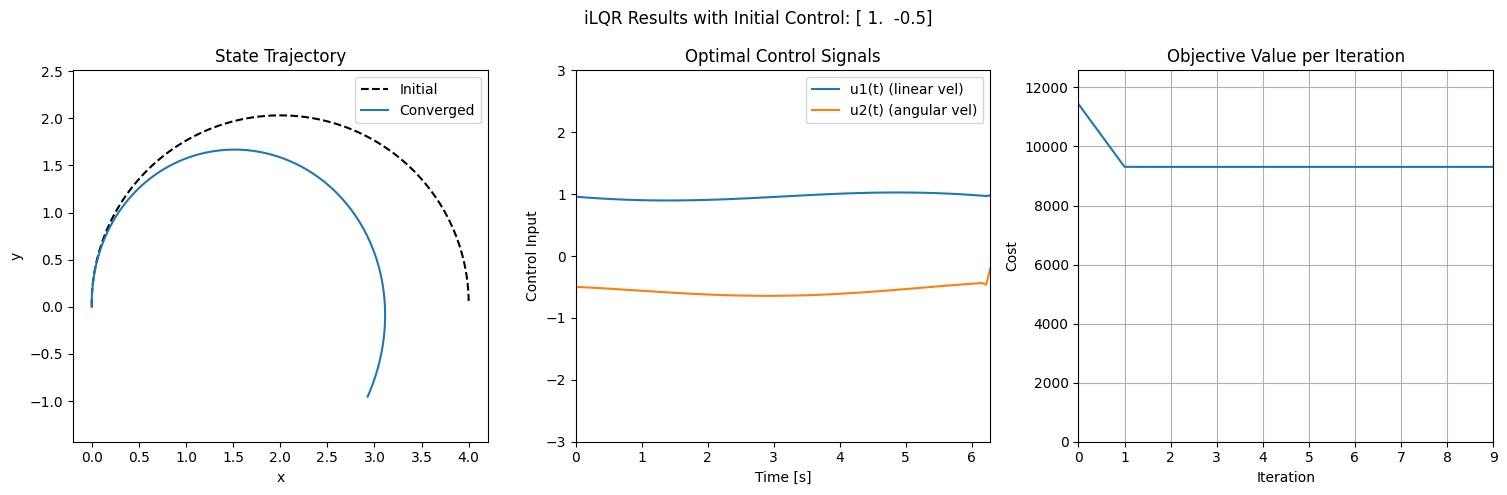

In [145]:
# Initial control
U0 = np.tile(np.array([1.0, -0.5]), (N, 1))
X_init = rollout(initial_state, U0)

# Run iLQR
X_opt, U_opt, cost_hist = discrete_ilqr(initial_state, U0, max_iter=10)
fig1, axs1 = create_plots(X_init, X_opt, U_opt, cost_hist, U0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


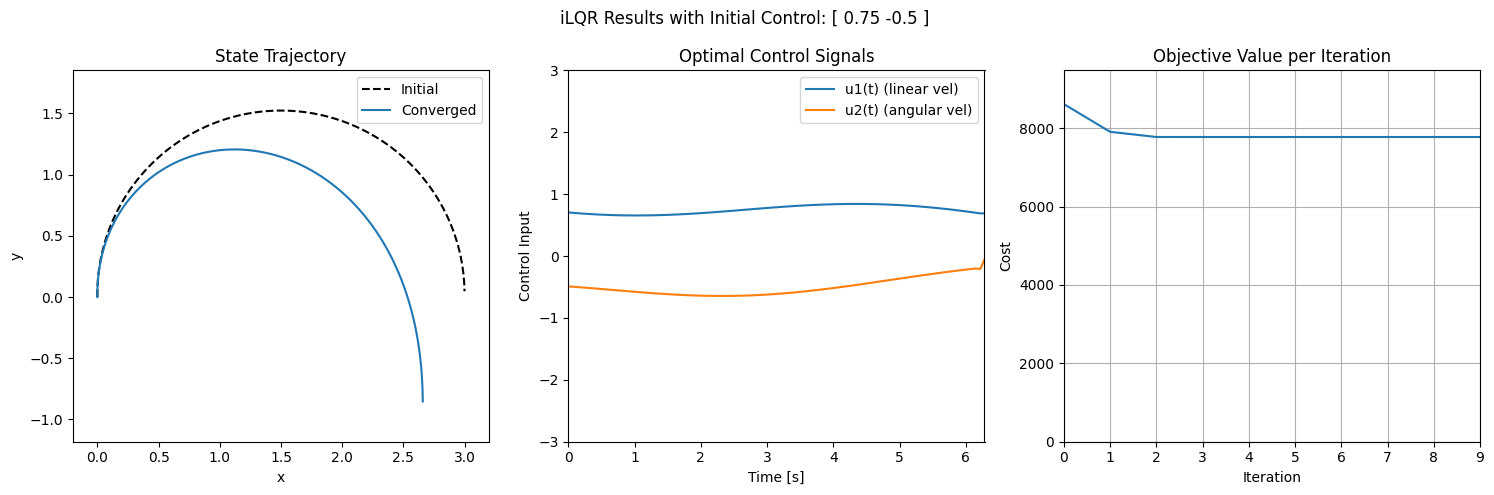

In [146]:
# Initial control
U0 = np.tile(np.array([0.75, -0.5]), (N, 1))
X_init = rollout(initial_state, U0)

# Run iLQR
X_opt, U_opt, cost_hist = discrete_ilqr(initial_state, U0, max_iter=10)
fig2, axs2 = create_plots(X_init, X_opt, U_opt, cost_hist, U0)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


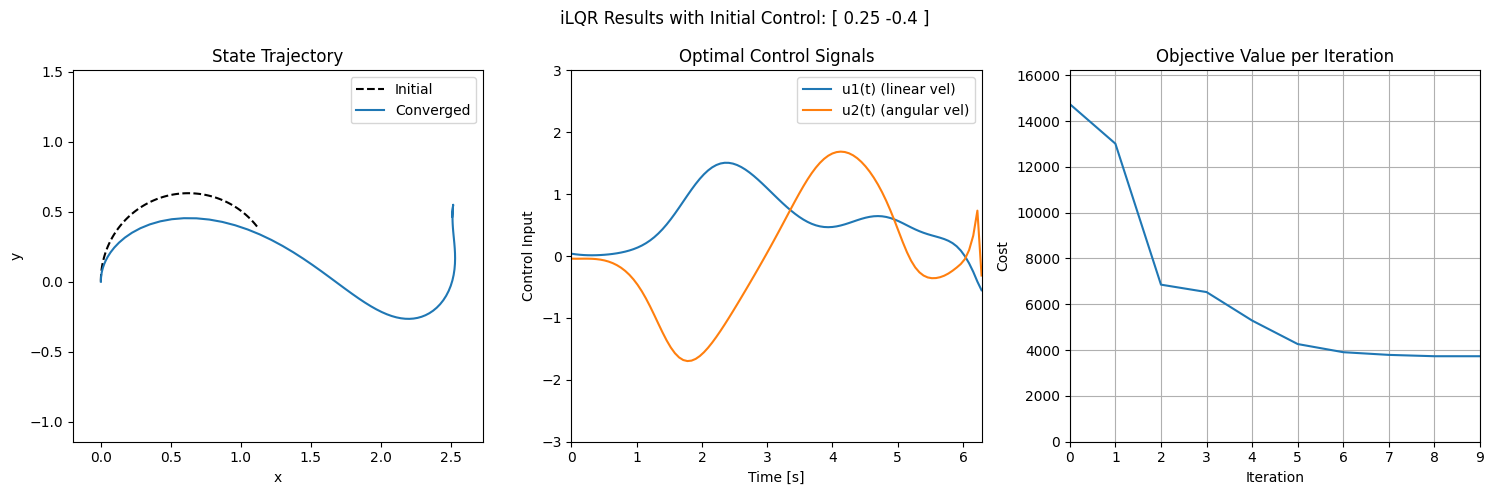

In [147]:
# Initial control
U0 = np.tile(np.array([0.25, -0.4]), (N, 1))
X_init = rollout(initial_state, U0)

# Run iLQR
X_opt, U_opt, cost_hist = discrete_ilqr(initial_state, U0, max_iter=10)
fig3, axs3 = create_plots(X_init, X_opt, U_opt, cost_hist, U0)

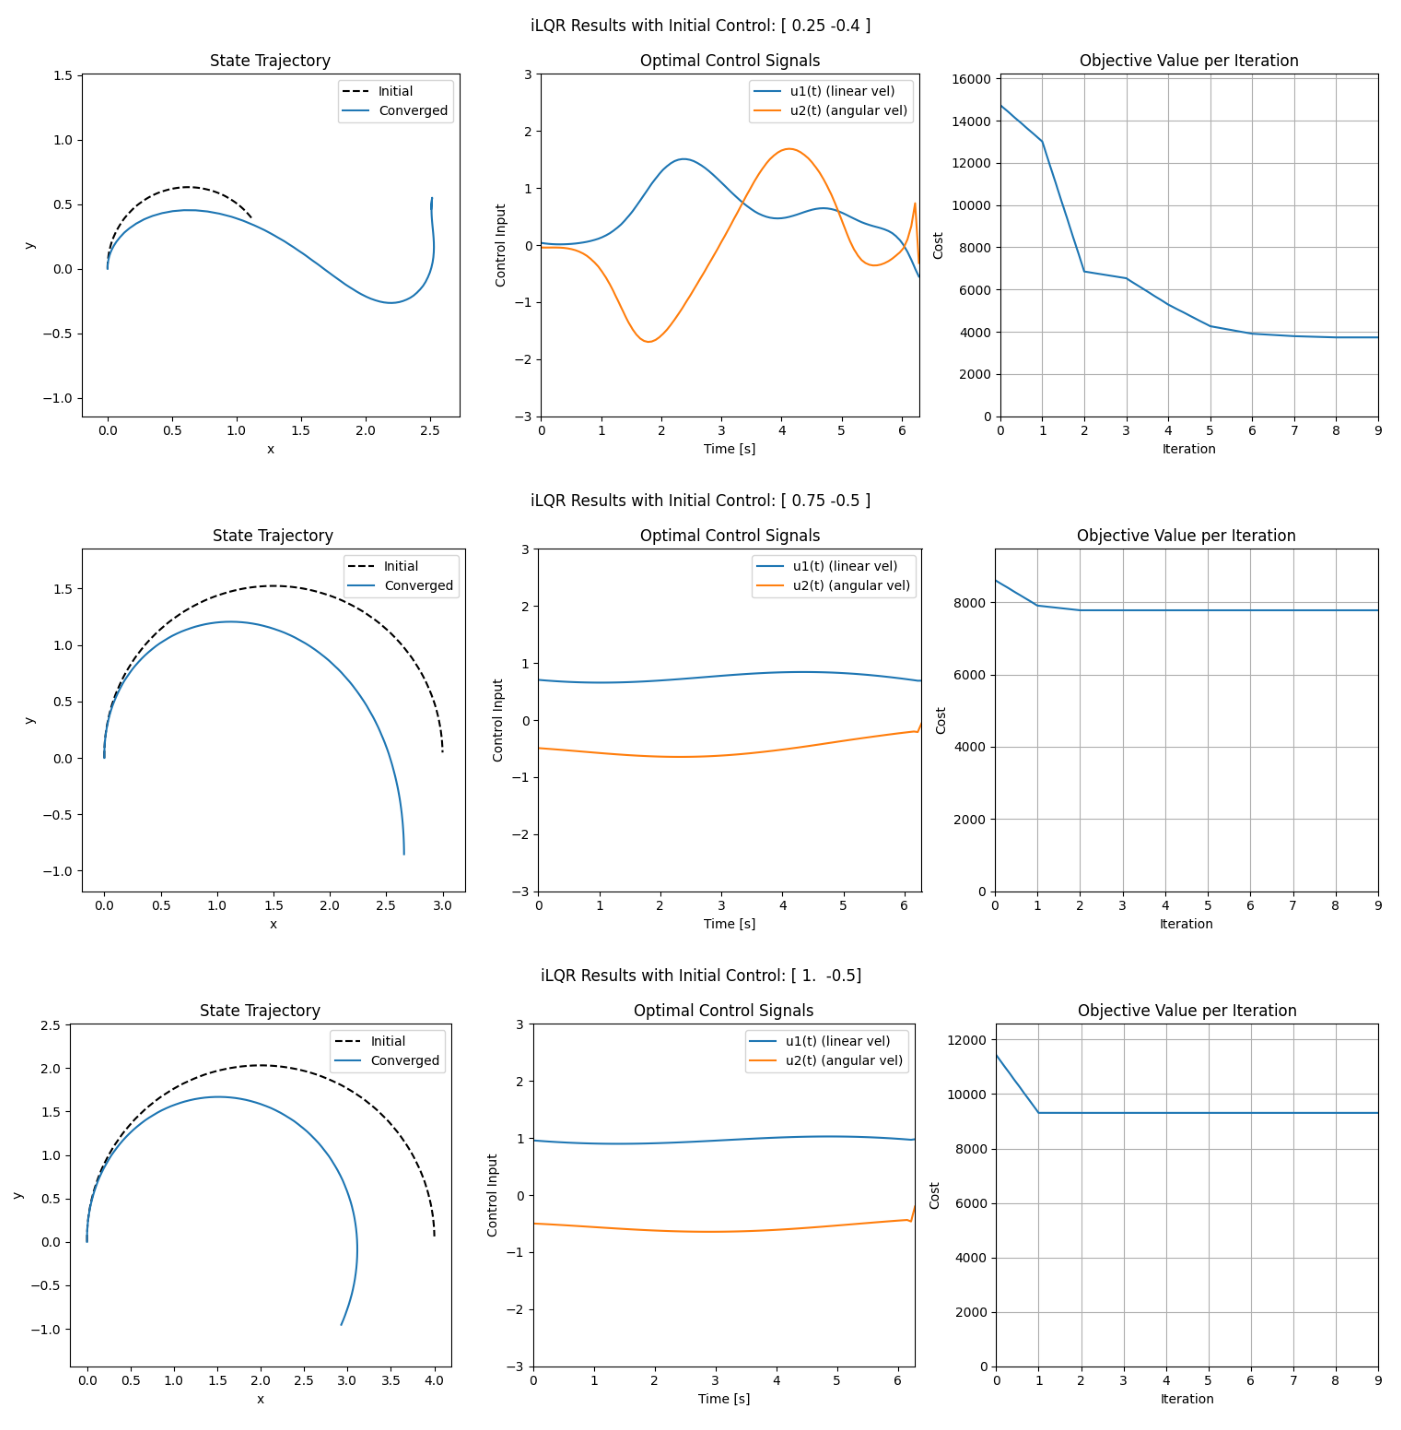

In [148]:
import glob
import matplotlib.pyplot as plt

# 1) Find and sort all your iLQR result files
files = sorted(glob.glob('iLQR_Results_*.png'))

# 2) Read them in
images = [plt.imread(f) for f in files]

# 3) Create a figure with one row per image
n = len(images)
fig, axes = plt.subplots(n, 1, figsize=(15, 5*n))

for ax, img, fname in zip(axes, images, files):
    ax.imshow(img)
    # ax.set_title(os.path.basename(fname), fontsize=12)
    ax.axis('off')

# plt.suptitle('All iLQR Results', fontsize=16, y=0.92)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # make room for the suptitle
fig.savefig('all_iLQR_Results.png', dpi=150)